## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv("Dataset.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


## Data Preprocessing

In [3]:
dataset = dataset.drop(columns="User ID")
dataset.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [4]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
ohe = OneHotEncoder(drop="first")

In [8]:
dataset["Gender"] = ohe.fit_transform(dataset[["Gender"]]).toarray()

In [9]:
dataset.head(3)  # 1 Male & 0 Female

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0


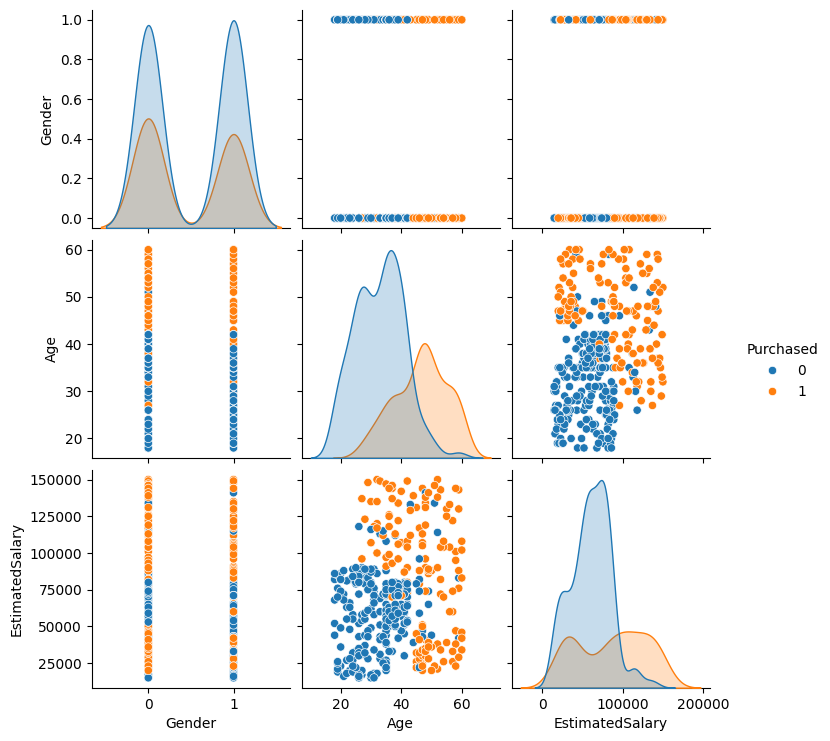

In [10]:
sns.pairplot(data=dataset,hue="Purchased")
plt.show()

In [11]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [12]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [13]:
sx = pd.DataFrame(ss.transform(x),columns=["Gender","Age","EstimatedSalary"])

### Training & Testing data

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Training & Testing data from scaled dataset

In [15]:
sx_train,sx_test,sy_train,sy_test = train_test_split(sx,y,test_size=0.2,random_state=0)

## Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(82.8125, 92.5)

In [18]:
lr1 = LogisticRegression()
lr1.fit(sx_train,sy_train)

LogisticRegression()

In [19]:
lr1.score(sx_train,sy_train)*100,lr1.score(sx_test,sy_test)*100

(82.5, 91.25)

## Naive Bayes

In [20]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [21]:
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(88.4375, 92.5)

In [22]:
gnb1 = GaussianNB()
gnb1.fit(sx_train,sy_train)

GaussianNB()

In [23]:
gnb1.score(sx_train,sy_train)*100,gnb1.score(sx_test,sy_test)*100

(88.125, 92.5)

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [25]:
mnb.score(x_train,y_train)*100,mnb.score(x_test,y_test)*100

(67.5, 57.49999999999999)

In [26]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [27]:
bnb.score(x_train,y_train)*100,bnb.score(x_test,y_test)*100

(62.18749999999999, 72.5)

In [28]:
bnb1 = BernoulliNB()
bnb1.fit(sx_train,sy_train)

BernoulliNB()

In [29]:
bnb1.score(sx_train,sy_train)*100,bnb1.score(sx_test,sy_test)*100

(70.0, 82.5)

## Decision Tree

### Using hyper-parameter tuning

In [30]:
pg = {"criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[i for i in range(2,20)]}

In [31]:
dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=pg)
dt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [32]:
dt.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [33]:
dt.best_score_

0.9

In [34]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(90.9375, 95.0)

### Using post pruning

In [35]:
for i in range(1,11):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(sx_train,sy_train)
    print(i,dt.score(sx_train,sy_train)*100,dt.score(sx_test,sy_test)*100,dt.score(sx_train,sy_train)*100-dt.score(sx_test,sy_test)*100)

1 81.5625 92.5 -10.9375
2 90.9375 95.0 -4.0625
3 91.25 95.0 -3.75
4 92.5 95.0 -2.5
5 93.75 93.75 0.0
6 95.0 88.75 6.25
7 96.25 92.5 3.75
8 97.5 93.75 3.75
9 98.125 93.75 4.375
10 98.75 91.25 7.5


In [36]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(93.75, 93.75)

## KNN

### Using post pruning

In [38]:
for i in range(1,30):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    print(i,kn.score(x_train,y_train)*100,kn.score(x_test,y_test)*100,kn.score(x_train,y_train)*100-kn.score(x_test,y_test)*100)

1 100.0 82.5 17.5
2 88.75 78.75 10.0
3 88.4375 78.75 9.6875
4 84.6875 82.5 2.1875
5 87.1875 83.75 3.4375
6 85.625 87.5 -1.875
7 84.6875 87.5 -2.8125
8 83.125 86.25 -3.125
9 83.75 86.25 -2.5
10 81.875 83.75 -1.875
11 86.25 88.75 -2.5
12 84.0625 88.75 -4.6875
13 83.4375 87.5 -4.0625
14 81.25 86.25 -5.0
15 79.375 83.75 -4.375
16 80.0 86.25 -6.25
17 81.25 85.0 -3.75
18 81.25 85.0 -3.75
19 83.125 87.5 -4.375
20 80.625 85.0 -4.375
21 80.3125 87.5 -7.1875
22 80.3125 85.0 -4.6875
23 82.5 87.5 -5.0
24 80.3125 83.75 -3.4375
25 82.5 85.0 -2.5
26 82.1875 85.0 -2.8125
27 82.1875 85.0 -2.8125
28 80.9375 83.75 -2.8125
29 80.9375 81.25 -0.3125


In [39]:
knn = KNeighborsClassifier(n_neighbors=29) # 31 when random state 42
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [40]:
knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100

(80.9375, 81.25)

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=2) # 5 when random state 42
knn1.fit(sx_train,sy_train)

KNeighborsClassifier(n_neighbors=2)

In [42]:
knn1.score(sx_train,sy_train)*100,knn1.score(sx_test,sy_test)*100

(92.1875, 92.5)

## SVC

In [43]:
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [44]:
svc.score(x_train,y_train)*100,svc.score(x_test,y_test)*100

(76.25, 82.5)

In [45]:
svc1 = SVC(kernel='rbf')
svc1.fit(sx_train,sy_train)

SVC()

In [46]:
svc1.score(sx_train,sy_train)*100,svc1.score(sx_test,sy_test)*100

(89.6875, 95.0)

## Analysis
### random state = 42
### Logistic Regression : accuracy train test (83.4375, 88.75) & with Scaling (81.5625, 88.75)
### Naive Bayes : accuracy train test (86.25, 93.75) & with Scaling (86.25, 93.75)
### Decision Tree : accuracy train test (91.875, 91.25) & with Scaling (91.875, 91.25)
### KNN : accuracy train test (80.3125, 80.0) & with Scaling (91.25, 91.25)
### SVC : accuracy train test (77.8125, 73.75) & with Scaling (91.25, 92.5)

### random state = 0
### Decision Tree : accuracy train test (93.75, 93.75) & with Scaling (93.75, 93.75)  👍
### KNN : accuracy train test (80.9375, 81.25) & with Scaling (92.1875, 92.5)

# Final model

In [47]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
model.score(x_train,y_train)*100,model.score(x_test,y_test)*100

(93.75, 93.75)

## Preditions

In [49]:
model.predict([[1,19,19000]])    # Male	19	19000	0

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Save the model

In [50]:
import joblib

In [51]:
joblib.dump(model,"ml_model.pkl")

['ml_model.pkl']

## How to load the model

In [52]:
load_model = joblib.load("ml_model.pkl")

In [53]:
load_model.predict([[1,19,19000]])

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)